# Import Libraries

In [14]:
import networkx as nx
import numpy as np
import pylab as pl
import scipy as sp
import time
import random
import queue
import pandas as pd
from IPython.display import display
from matplotlib import pyplot as plt
%matplotlib inline

# Read network from text file

+ Location of data for draw graph

In [15]:
data_loc=r'C:\Users\pc\Desktop\old desk\Documents\Data 620\Assignment2\\'
graph_file=data_loc+ 'com-amazon.ungraph.txt'
com_file=data_loc+'com-amazon.all.dedup.cmty.txt'
top_com_file=data_loc+'com-amazon.top5000.cmty.txt'


+ Load graph from text files

In [16]:
g = nx.read_edgelist(graph_file)

+ Analysis graph

In [17]:
# find number of nodes and edges 
N,K=g.order(),g.size()
avg_deg=K/N
# Display number of nodes and edges
print('Number of nodes of the graph: ',N)
print('Number of edges of the graph: ',K)
print('Average degree : ',avg_deg)

Number of nodes of the graph:  334863
Number of edges of the graph:  925872
Average degree :  2.7649277465709856


In [18]:
# Density of graph
density=nx.density(g)
print('Network density: ',density)

Network density:  1.6513834036534368e-05


In [ ]:
# finding triadic closure
triadic_closure = nx.transitivity(g)
print("Triadic closure:", triadic_closure)

In [ ]:
# degree of graph
degree_dict = dict(g.degree(g.nodes()))
nx.set_node_attributes(g, degree_dict, 'degree')
degrees_vals = sorted(degree_dict.items(),reverse=True)
print("Top 20 nodes by degree:")
for d in degrees_vals[:20]:
    print(d)
# plot histogram

In [ ]:
# Clustering coefficient
clust_coefficients = nx.clustering(g)
print(type(clust_coefficients))
avg_clust = sum(clust_coefficients.values()) / len(clust_coefficients)
print(avg_clust)

In [ ]:
# function for get subgraph
def get_subgraph_bfs(graph, start_node, num_node):
    node_set = set()
    probbed = {start_node}
    bfs_queue = queue.deque()
    bfs_queue.append(start_node)
    while len(bfs_queue) > 0:
        i = bfs_queue.popleft()
        node_set.add(i)
        for j in g[i]:
            if j not in probbed:
                probbed.add(j)
                bfs_queue.append(j)
        if len(node_set) >= num_node:
            return nx.subgraph(graph, node_set)

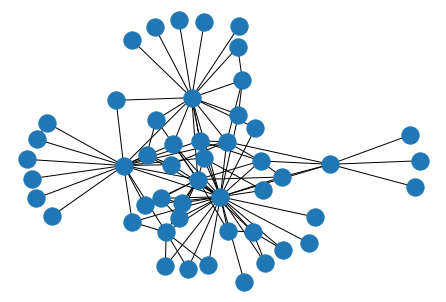

In [12]:
# get subgraph with 50 nodes
subgraph = get_subgraph_bfs(g, '1', 50)
# draw subgraph

nx.draw(subgraph)
plt.savefig("subgraph.png")

In [13]:
# get diameter of subpgrah
d=nx.diameter(subgraph)
print('Diameter of the subgraph: ',d)

Diameter of the subgraph:  4
